# Import

In [115]:
# from google.colab import drive
# drive.mount('/content/drive')

In [116]:
import pandas as pd

In [117]:
# log_order = pd.read_csv('/content/drive/MyDrive/data_station/project/Data02_포장회사데이터/log_order.csv')
# master_member = pd.read_csv('/content/drive/MyDrive/data_station/project/Data02_포장회사데이터/master_member.csv')
# master_product = pd.read_csv('/content/drive/MyDrive/data_station/project/Data02_포장회사데이터/master_product.csv')

In [118]:
log_order = pd.read_csv('log_order.csv')
master_member = pd.read_csv('master_member.csv')
master_product = pd.read_csv('master_product.csv')

# Apply func

In [119]:
def func(data):
    return data.split(' ')[0]

# log_order

In [120]:
log_order.columns 
# drop =네이버 포인트, 배송비 정보, 사용한 적립금액, 교환구분, 상품별 추가할인금액, 주문번호, 쿠폰 할인금액, 품목번호,수량
#  결제수단, 공급원가, , 수령인 주소, 주문 시 회원등급, 주문경로, 주문일시, 주문자ID, 판매가, 마진

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호'],
      dtype='object')

In [121]:
log_order['주문경로'].value_counts()

PC쇼핑몰     25695
모바일웹      18531
네이버 페이     2523
Name: 주문경로, dtype: int64

In [122]:
log_order[log_order['수량']==46]#.value_counts()

,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수량,수령인 주소,주문 시 회원등급,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호
24512,무통장입금,85250.0,교환안함,0,D-20180620-0000432-00,무료,2018-06-28 오후 6:34,2018-07-02 오전 5:32,0,4963400,"사각 죽용기 대 1,050ml 500개 1set(2박스)",92.0,460000,46,경기도 여주시 청심로 35-21 (하동),관리자,PC쇼핑몰,20180620-0000432,2018-06-20 오후 4:27,packus,NaN,0,107900,13570


In [123]:
log_order['주문 시 회원등급'].value_counts()

사업자         15927
일반          15177
전화주문 고객     11860
딜러 유치 회원      463
특별회원          111
관리자            75
딜러             30
VIP             1
Name: 주문 시 회원등급, dtype: int64

In [124]:
log_order.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호'],
      dtype='object')

In [125]:
# df_log = log_order[['결제수단', '공급원가', '수량','수령인 주소', '주문 시 회원등급',
#            '주문경로', '주문일시', '주문자ID', '판매가', '마진', '주문일시_년', '주문일시_월', '주문일시_일']]
# # df_log['주문경로'].value_counts()
# df_log


# log_order['주문일시'] = pd.to_datetime(log_order['주문일시'])

log_order['주문일시_년'] = log_order['주문일시'].dt.year
log_order['주문일시_월'] = log_order['주문일시'].dt.month
log_order['주문일시_일'] = log_order['주문일시'].dt.day

log_order

In [126]:
log_order.pivot_table(index='주문경로', columns='주문 시 회원등급',values='판매가', aggfunc='sum')

주문 시 회원등급,VIP,관리자,딜러,딜러 유치 회원,사업자,일반,전화주문 고객,특별회원
주문경로,,,,,,,,
PC쇼핑몰,NaN,3583005.0,2110680.0,16603690.0,421221770.0,325764710.0,677170320.0,2154890.0
모바일웹,0.0,NaN,NaN,12866760.0,489260800.0,549027070.0,1083000.0,4049480.0


In [127]:
log_order['품목번호'].value_counts()

42602    1
23212    1
23215    1
23216    1
23223    1
        ..
75811    1
75813    1
75815    1
75816    1
3179     1
Name: 품목번호, Length: 46749, dtype: int64

In [128]:
# log_order = log_order.drop(columns='date')
log_order = log_order.dropna()

# 날짜만 필요하기 때문에 어잔/오후, 시간은 뺀것
log_order['배송완료일'] = log_order['배송완료일'].apply(func)
log_order['배송시작일'] = log_order['배송시작일'].apply(func)
log_order['주문일시'] = log_order['주문일시'].apply(func)

# 판매가에서 공급원가를 빼 마진 확인
log_order['마진'] = log_order['판매가'] - log_order['공급원가']


log_order[['상품명', '상품번호', '수량', '주문경로', '주문번호', '주문일시','주문자ID', '품목번호','공급원가', '판매가', '마진']]
log_order

,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수량,수령인 주소,주문 시 회원등급,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,마진
33,카드,37400.0,교환안함,0,D-20190101-0000017-00,무료,2019-01-03,2019-01-07,0,233640,PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기),455.0,35200,4,경상남도 김해시 내동 1117-1,일반,PC쇼핑몰,20190101-0000017,2019-01-01,31739713@n,현대,0,58410,43319,21010.0
37,카드,49500.0,교환안함,0,D-20190101-0000038-00,무료,2019-01-03,2019-01-07,0,78870,"105파이 다용도컵 세트 5호 중 300ml 블랙 PS-1,000개 1set(2박스)",1070.0,17400,1,충청북도 진천군 덕산면 두촌리 2703,일반,모바일웹,20190101-0000038,2019-01-01,998948808@k,현대,0,78870,43327,29370.0
38,카드,59400.0,교환안함,0,D-20190101-0000038-01,무료,2019-01-03,2019-01-07,0,93720,반찬용기 202-2 2칸 블랙 1000개 1set(2박스),1230.0,14100,1,충청북도 진천군 덕산면 두촌리 2703,일반,모바일웹,20190101-0000038,2019-01-01,998948808@k,현대,0,93720,43328,34320.0
39,카드,44550.0,교환안함,0,D-20190101-0000038-02,무료,2019-01-03,2019-01-07,0,71450,195파이 탕용기 소 300개 1set(2박스),1077.0,13600,1,충청북도 진천군 덕산면 두촌리 2703,일반,모바일웹,20190101-0000038,2019-01-01,998948808@k,현대,0,71450,43329,26900.0
45,카드,69300.0,교환안함,0,D-20190101-0000092-00,무료,2019-01-03,2019-01-07,0,108570,"270파이 탕용기 왕대 6,500ml 100개 1set(1박스)",382.0,17300,1,충청북도 청주시 서원구 미평동 47-2,일반,모바일웹,20190101-0000092,2019-01-01,yongdduk,NH (농협),0,108570,43344,39270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46714,카드,36300.0,교환안함,0,D-20171227-0000011-00,무료,2017-12-27,2017-12-31,0,52800,PP 4칸 도시락용기 B 200개 1박스,446.0,6340,1,서울특별시 성동구 살곶이4길 10 (행당동),일반,PC쇼핑몰,20171227-0000011,2017-12-27,johnnyryuu,국민,0,52800,3117,16500.0
46736,카드,71500.0,교환안함,0,D-20171228-0000126-00,무료,2017-12-29,2018-01-02,0,93000,사각 죽용기 소 550ml 500개 1set(2박스),88.0,7440,1,경상북도 포항시 북구 법원로51번길 26 (장성동),일반,모바일웹,20171228-0000126,2017-12-28,motoleesk,비씨,0,93000,3160,21500.0
46744,카드,36300.0,교환안함,0,D-20171229-0000036-00,무료,2017-12-29,2018-01-02,0,52800,PP 4칸 도시락용기 A 200개 1박스,445.0,6340,1,서울특별시 서초구 강남대로97길 23 (잠원동),일반,모바일웹,20171229-0000036,2017-12-29,73987748@n,국민,0,52800,3170,16500.0
46745,카드,36300.0,교환안함,0,D-20171229-0000043-00,무료,2018-01-03,2018-01-07,0,112200,PP 6칸 도시락용기 02 200개 1박스,172.0,13460,2,경기도 의정부시 용민로 483 (민락동),사업자,모바일웹,20171229-0000043,2017-12-29,chuheesuk,비씨,0,56100,3172,19800.0


In [129]:
log_order.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호', '마진'],
      dtype='object')

log_order['마진'].info()

log_order.rename(columns={'마진':'순이익'})

In [130]:
log_order.to_csv('log_order2.csv')

In [131]:
#마진이 -값이면 0으로 치환
def func2(data):
    if data < 0:
        return 0
    else:
        return data
    
log_order['마진'] = log_order['마진'].apply(func2)
log_order

,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수량,수령인 주소,주문 시 회원등급,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,마진
33,카드,37400.0,교환안함,0,D-20190101-0000017-00,무료,2019-01-03,2019-01-07,0,233640,PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기),455.0,35200,4,경상남도 김해시 내동 1117-1,일반,PC쇼핑몰,20190101-0000017,2019-01-01,31739713@n,현대,0,58410,43319,21010.0
37,카드,49500.0,교환안함,0,D-20190101-0000038-00,무료,2019-01-03,2019-01-07,0,78870,"105파이 다용도컵 세트 5호 중 300ml 블랙 PS-1,000개 1set(2박스)",1070.0,17400,1,충청북도 진천군 덕산면 두촌리 2703,일반,모바일웹,20190101-0000038,2019-01-01,998948808@k,현대,0,78870,43327,29370.0
38,카드,59400.0,교환안함,0,D-20190101-0000038-01,무료,2019-01-03,2019-01-07,0,93720,반찬용기 202-2 2칸 블랙 1000개 1set(2박스),1230.0,14100,1,충청북도 진천군 덕산면 두촌리 2703,일반,모바일웹,20190101-0000038,2019-01-01,998948808@k,현대,0,93720,43328,34320.0
39,카드,44550.0,교환안함,0,D-20190101-0000038-02,무료,2019-01-03,2019-01-07,0,71450,195파이 탕용기 소 300개 1set(2박스),1077.0,13600,1,충청북도 진천군 덕산면 두촌리 2703,일반,모바일웹,20190101-0000038,2019-01-01,998948808@k,현대,0,71450,43329,26900.0
45,카드,69300.0,교환안함,0,D-20190101-0000092-00,무료,2019-01-03,2019-01-07,0,108570,"270파이 탕용기 왕대 6,500ml 100개 1set(1박스)",382.0,17300,1,충청북도 청주시 서원구 미평동 47-2,일반,모바일웹,20190101-0000092,2019-01-01,yongdduk,NH (농협),0,108570,43344,39270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46714,카드,36300.0,교환안함,0,D-20171227-0000011-00,무료,2017-12-27,2017-12-31,0,52800,PP 4칸 도시락용기 B 200개 1박스,446.0,6340,1,서울특별시 성동구 살곶이4길 10 (행당동),일반,PC쇼핑몰,20171227-0000011,2017-12-27,johnnyryuu,국민,0,52800,3117,16500.0
46736,카드,71500.0,교환안함,0,D-20171228-0000126-00,무료,2017-12-29,2018-01-02,0,93000,사각 죽용기 소 550ml 500개 1set(2박스),88.0,7440,1,경상북도 포항시 북구 법원로51번길 26 (장성동),일반,모바일웹,20171228-0000126,2017-12-28,motoleesk,비씨,0,93000,3160,21500.0
46744,카드,36300.0,교환안함,0,D-20171229-0000036-00,무료,2017-12-29,2018-01-02,0,52800,PP 4칸 도시락용기 A 200개 1박스,445.0,6340,1,서울특별시 서초구 강남대로97길 23 (잠원동),일반,모바일웹,20171229-0000036,2017-12-29,73987748@n,국민,0,52800,3170,16500.0
46745,카드,36300.0,교환안함,0,D-20171229-0000043-00,무료,2018-01-03,2018-01-07,0,112200,PP 6칸 도시락용기 02 200개 1박스,172.0,13460,2,경기도 의정부시 용민로 483 (민락동),사업자,모바일웹,20171229-0000043,2017-12-29,chuheesuk,비씨,0,56100,3172,19800.0


In [132]:
log_order[log_order['판매가'] == 0][['공급원가', '판매가']]

,공급원가,판매가
17558,0.0,0
17565,8800.0,0
17569,4690.0,0
17572,4690.0,0
17589,1600.0,0
...,...,...
46612,1910.0,0
46615,1910.0,0
46648,1910.0,0
46651,1910.0,0


In [133]:
log_order.pivot_table(index='주문일시' ,columns='주문경로', values='판매가')

주문경로,PC쇼핑몰,모바일웹
주문일시,,
2017-01-15,17000.000000,NaN
2017-01-23,17000.000000,NaN
2017-02-02,72000.000000,NaN
2017-02-06,11700.000000,7115.000000
2017-02-13,NaN,37566.666667
...,...,...
2019-05-27,60673.000000,58719.019608
2019-05-28,50095.294118,63443.888889
2019-05-29,63506.428571,57902.000000


In [134]:
log_order.isnull().sum()

결제수단          0
공급원가          0
교환구분          0
네이버 포인트       0
배송번호          0
배송비 정보        0
배송시작일         0
배송완료일         0
사용한 적립금액      0
상품구매금액        0
상품명           0
상품번호          0
상품별 추가할인금액    0
수량            0
수령인 주소        0
주문 시 회원등급     0
주문경로          0
주문번호          0
주문일시          0
주문자ID         0
카드사           0
쿠폰 할인금액       0
판매가           0
품목번호          0
마진            0
dtype: int64

In [135]:
log_order['date'] = log_order['주문일시'].apply(func)
log_order.pivot_table(index='date', values='판매가', aggfunc='sum').reset_index()

,date,판매가
0,2017-01-15,17000
1,2017-01-23,17000
2,2017-02-02,72000
3,2017-02-06,25930
4,2017-02-13,112700
...,...,...
690,2019-05-27,4814860
691,2019-05-28,3135600
692,2019-05-29,2047130
693,2019-05-30,2315440


# master_member

In [136]:
master_member.columns

# drop = 
#  ID, 나이, 성별, 주소(동/읍/면), 유입경로, 유입기기, 사업자구분, 회원구분, '최종접속일', '최종주문일'

Index(['ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일', '유입경로',
       '유입기기', '회원 가입일', '사업자구분', '회원구분'],
      dtype='object')

In [137]:
master_member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6575 entries, 0 to 6574
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         6575 non-null   object
 1   나이         6575 non-null   int64 
 2   사용가능 적립금   6575 non-null   int64 
 3   성별         6575 non-null   object
 4   주소(동/읍/면)  5941 non-null   object
 5   최종접속일      6523 non-null   object
 6   최종주문일      5153 non-null   object
 7   유입경로       6575 non-null   object
 8   유입기기       6575 non-null   object
 9   회원 가입일     6575 non-null   object
 10  사업자구분      6575 non-null   object
 11  회원구분       6575 non-null   object
dtypes: int64(2), object(10)
memory usage: 616.5+ KB


In [138]:
master_member[['ID', '나이', '성별', '주소(동/읍/면)', '유입경로', '유입기기', '사업자구분',
               '회원구분', '최종접속일', '최종주문일']].isnull().sum()

ID              0
나이              0
성별              0
주소(동/읍/면)     634
유입경로            0
유입기기            0
사업자구분           0
회원구분            0
최종접속일          52
최종주문일        1422
dtype: int64

In [139]:
master_member.isnull().sum()

ID              0
나이              0
사용가능 적립금        0
성별              0
주소(동/읍/면)     634
최종접속일          52
최종주문일        1422
유입경로            0
유입기기            0
회원 가입일          0
사업자구분           0
회원구분            0
dtype: int64

In [140]:
df_merge = pd.merge(log_order, master_member, left_on='주문자ID', right_on='ID', how='inner')
df_merge

,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수량,수령인 주소,주문 시 회원등급,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,마진,date,ID,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분
0,카드,37400.0,교환안함,0,D-20190101-0000017-00,무료,2019-01-03,2019-01-07,0,233640,PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기),455.0,35200,4,경상남도 김해시 내동 1117-1,일반,PC쇼핑몰,20190101-0000017,2019-01-01,31739713@n,현대,0,58410,43319,21010.0,2019-01-01,31739713@n,40,0,여자,경상남도 김해시 내동 1117-1,2019-05-28 오후 1:51,2019-05-28 오후 1:56,SNS광고,모바일,2018-11-11,개인,일반
1,카드,44000.0,교환안함,0,D-20190103-0000113-00,무료,2019-01-03,2019-01-07,0,141240,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",42.0,19800,2,경상남도 김해시 내동 1117-1,일반,모바일웹,20190103-0000113,2019-01-03,31739713@n,현대,0,70620,43749,26620.0,2019-01-03,31739713@n,40,0,여자,경상남도 김해시 내동 1117-1,2019-05-28 오후 1:51,2019-05-28 오후 1:56,SNS광고,모바일,2018-11-11,개인,일반
2,"쿠폰,카드",74250.0,교환안함,0,D-20190108-0000743-00,무료,2019-01-10,2019-01-14,0,116000,사각 죽용기 신형 중 750ml 500개 1set(2박스),605.0,17400,1,경상남도 김해시 율하2로 125 (율하동),일반,PC쇼핑몰,20190108-0000743,2019-01-08,31739713@n,현대,8800,116000,45019,41750.0,2019-01-08,31739713@n,40,0,여자,경상남도 김해시 내동 1117-1,2019-05-28 오후 1:51,2019-05-28 오후 1:56,SNS광고,모바일,2018-11-11,개인,일반
3,"쿠폰,카드",37400.0,교환안함,0,D-20190115-0000586-00,무료,2019-01-16,2019-01-20,0,175230,PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기),455.0,26400,3,경상남도 김해시 내동 1117-1,일반,PC쇼핑몰,20190115-0000586,2019-01-15,31739713@n,현대,8760,58410,46597,21010.0,2019-01-15,31739713@n,40,0,여자,경상남도 김해시 내동 1117-1,2019-05-28 오후 1:51,2019-05-28 오후 1:56,SNS광고,모바일,2018-11-11,개인,일반
4,"쿠폰,카드",44000.0,교환안함,0,D-20190127-0000199-00,무료,2019-01-29,2019-02-02,0,141240,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",42.0,19800,2,경상남도 김해시 내동 1117-1,일반,PC쇼핑몰,20190127-0000199,2019-01-27,31739713@n,현대,12900,70620,49310,26620.0,2019-01-27,31739713@n,40,0,여자,경상남도 김해시 내동 1117-1,2019-05-28 오후 1:51,2019-05-28 오후 1:56,SNS광고,모바일,2018-11-11,개인,일반
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14442,카드,2000.0,교환안함,0,D-20171226-0000213-04,무료,2017-12-27,2017-12-31,0,7600,70파이 다용도컵 세트 1호(소/40ml)_투명/PS-100개 소량,63.0,0,1,충청남도 아산시 음봉면 월암로 33,일반,PC쇼핑몰,20171226-0000213,2017-12-26,pageone,씨티,0,7600,3107,5600.0,2017-12-26,pageone,44,0,남자,충청남도 아산시 음봉면 월암로 33,2017-12-26 오후 7:23,2017-12-26 오후 7:26,블로그광고,PC,2017-12-26,사업자,사업자
14443,카드,1350.0,교환안함,0,D-20171226-0000213-05,무료,2017-12-27,2017-12-31,0,5500,70파이 다용도컵 세트 1호(특소/50ml)_백색/PS-100개 소량,62.0,0,1,충청남도 아산시 음봉면 월암로 33,일반,PC쇼핑몰,20171226-0000213,2017-12-26,pageone,씨티,0,5500,3108,4150.0,2017-12-26,pageone,44,0,남자,충청남도 아산시 음봉면 월암로 33,2017-12-26 오후 7:23,2017-12-26 오후 7:26,블로그광고,PC,2017-12-26,사업자,사업자
14444,카드,47850.0,교환안함,0,D-20171226-0000213-06,무료,2017-12-27,2017-12-31,0,107800,195파이 탕용기 대 300개 1set(2박스),608.0,18330,1,충청남도 아산시 음봉면 월암로 33,일반,PC쇼핑몰,20171226-0000213,2017-12-26,pageone,씨티,0,107800,3109,59950.0,2017-12-26,pageone,44,0,남자,충청남도 아산시 음봉면 월암로 33,2017-12-26 오후 7:23,2017-12-26 오후 7:26,블로그광고,PC,2017-12-26,사업자,사업자
14445,카드,36300.0,교환안함,0,D-20171227-0000011-00,무료,2017-12-27,2017-12-31,0,52800,PP 4칸 도시락용기 B 200개 1박스,446.0,6340,1,서울특별시 성동구 살곶이4길 10 (행당동),일반,PC쇼핑몰,20171227-0000011,2017-12-27,johnnyryuu,국민,0,52800,3117,16500.0,2017-12-27,johnnyryuu,47,0,여자,서울특별시 성동구 살곶이4길 10 (행당동),2018-02-01 오후 4:01,2017-12-27 오전 2:42,블로그광고,PC,2017-12-27,개인,일반


In [141]:
df_merge.isnull().sum()
df_merge2 = df_merge.drop(columns='카드사')
df_merge2 = df_merge2.dropna()
df_merge2.isnull().sum()
# df_merge2['상품번호'], product['상품코드']

df_merge3 = pd.merge(df_merge2, master_product, left_on='상품번호', right_on='상품코드', how = 'inner')
df_merge3.to_csv('result.csv')

In [142]:
master_member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6575 entries, 0 to 6574
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         6575 non-null   object
 1   나이         6575 non-null   int64 
 2   사용가능 적립금   6575 non-null   int64 
 3   성별         6575 non-null   object
 4   주소(동/읍/면)  5941 non-null   object
 5   최종접속일      6523 non-null   object
 6   최종주문일      5153 non-null   object
 7   유입경로       6575 non-null   object
 8   유입기기       6575 non-null   object
 9   회원 가입일     6575 non-null   object
 10  사업자구분      6575 non-null   object
 11  회원구분       6575 non-null   object
dtypes: int64(2), object(10)
memory usage: 616.5+ KB


In [143]:
df_merge['상품번호'] = df_merge['상품번호'].dropna(how='all')
df_merge['상품번호'].isnull().sum()
# df_merge['상품번호'].isnull()
# df_merge['상품번호'] = df_merge['상품번호'].astype(int)

0

In [144]:
master_member['최종주문일_'] = master_member['최종주문일'].dropna()
master_member['최종주문일_'].dropna()#.isnull().sum()

1        2017-01-01 오후 3:38
2       2017-02-26 오후 10:55
4        2018-12-19 오후 1:29
5        2017-01-18 오후 4:41
6        2017-02-13 오후 3:12
               ...         
6567    2019-05-31 오전 10:07
6568     2019-05-31 오후 4:58
6569     2019-05-31 오후 3:17
6570     2019-05-31 오후 4:30
6573    2019-06-19 오전 11:18
Name: 최종주문일_, Length: 5153, dtype: object

In [145]:
# def func1(data):
#     if '오전' in data:
#         return data
#     elif '오후' in data
#     return data
    
def func1(data):    
    return data

master_member['최종주문일_'].dropna().apply(func1)

1        2017-01-01 오후 3:38
2       2017-02-26 오후 10:55
4        2018-12-19 오후 1:29
5        2017-01-18 오후 4:41
6        2017-02-13 오후 3:12
               ...         
6567    2019-05-31 오전 10:07
6568     2019-05-31 오후 4:58
6569     2019-05-31 오후 3:17
6570     2019-05-31 오후 4:30
6573    2019-06-19 오전 11:18
Name: 최종주문일_, Length: 5153, dtype: object

In [146]:
master_member['최종주문일'].isnull().sum()

1422

In [147]:
master_member[['최종접속일', '최종주문일','회원 가입일']] # .isnull().sum()

,최종접속일,최종주문일,회원 가입일
0,2016-12-30 오후 5:57,NaN,2016-12-30
1,2017-01-02 오후 12:32,2017-01-01 오후 3:38,2017-01-01
2,2017-02-26 오후 10:52,2017-02-26 오후 10:55,2017-01-14
3,2017-01-23 오후 6:25,NaN,2017-01-17
4,2018-12-19 오후 1:26,2018-12-19 오후 1:29,2017-01-17
...,...,...,...
6570,2019-05-31 오후 4:38,2019-05-31 오후 4:30,2019-05-31
6571,2019-06-21 오후 9:38,NaN,2019-06-05
6572,2019-06-12 오후 7:59,NaN,2019-06-12
6573,2019-06-19 오전 10:59,2019-06-19 오전 11:18,2019-06-19


# master_product

In [148]:
# master_product = pd.read_csv('master_product.csv')#.value_counts()
# master_product.isnull().sum()
# drop : 상품코드

In [149]:
df = pd.merge(master_member,log_order, how='inner', left_on = 'ID', right_on='주문자ID')
df.columns

Index(['ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일', '유입경로',
       '유입기기', '회원 가입일', '사업자구분', '회원구분', '최종주문일_', '결제수단', '공급원가', '교환구분',
       '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액',
       '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소', '주문 시 회원등급', '주문경로',
       '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가', '품목번호', '마진', 'date'],
      dtype='object')

In [150]:
df['주소'] = df['주소(동/읍/면)'].fillna(0)
df['주소']

0        전라북도 전주시 완산구 효자동3가 1676-13
1        전라북도 전주시 완산구 효자동3가 1676-13
2        전라북도 전주시 완산구 효자동3가 1676-13
3            광주광역시 서구 화운로 152 (화정동)
4            광주광역시 서구 화운로 152 (화정동)
                    ...            
14442                 서울특별시 용산구 후암동
14443                             0
14444                             0
14445                             0
14446                             0
Name: 주소, Length: 14447, dtype: object

In [151]:
df['주소'] = df['주소(동/읍/면)'].fillna(0)
df['주소']

for i in df['주소']:
    if i == 0 :
         df['주소'] = df['수령인 주소']
    else:
        continue

In [152]:
import seaborn as sns

def func3(data):
    return data.split('(')[0].split(' ')[0]

df['주소'].apply(func3)


0         전라북도
1         전라북도
2         전라북도
3        광주광역시
4        광주광역시
         ...  
14442    서울특별시
14443     전라북도
14444     충청남도
14445     충청남도
14446    대전광역시
Name: 주소, Length: 14447, dtype: object

# Merge

- df_merge = pd.merge(log_order, master_member, left_on='주문자ID', right_on='ID', how='inner')
- df_merge2 = df_merge.drop(columns='카드사')
- df_merge3 = pd.merge(df_merge2, master_product, left_on='상품번호', right_on='상품코드', how = 'inner')

In [153]:
df_merge3.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '쿠폰 할인금액', '판매가_x',
       '품목번호', '마진', 'date', 'ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)',
       '최종접속일', '최종주문일', '유입경로', '유입기기', '회원 가입일', '사업자구분', '회원구분', '#', '공급사',
       '과세/면세', '담기', '매입가', '상품명(기본)', '상품코드', '재입고알림', '제조사', '카테고리',
       '판매가_y', '품절여부', '후기'],
      dtype='object')

In [154]:
df_merge3['주문일시']

0        2019-01-01
1        2019-01-15
2        2019-01-27
3        2019-02-13
4        2019-02-27
            ...    
10296    2018-09-06
10297    2018-09-10
10298    2018-10-03
10299    2017-07-06
10300    2017-12-07
Name: 주문일시, Length: 10301, dtype: object

In [155]:
def func(data):
    return data.split(' ')[0]

df_merge3['주문일시_dt'] = pd.to_datetime(df_merge3['주문일시'].apply(func)).drop(columns='주문일시')

In [156]:
df_merge3[['판매가_x', '판매가_y']]

count = 0
for i in range(len(df_merge3)):
    if df_merge3['판매가_x'][i] == df_merge3['판매가_y'][i] :
        count += 1

In [157]:
df_merge3

,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수량,수령인 주소,주문 시 회원등급,주문경로,주문번호,주문일시,주문자ID,쿠폰 할인금액,판매가_x,품목번호,마진,date,ID,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,#,공급사,과세/면세,담기,매입가,상품명(기본),상품코드,재입고알림,제조사,카테고리,판매가_y,품절여부,후기,주문일시_dt
0,카드,37400.0,교환안함,0,D-20190101-0000017-00,무료,2019-01-03,2019-01-07,0,233640,PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기),455.0,35200,4,경상남도 김해시 내동 1117-1,일반,PC쇼핑몰,20190101-0000017,2019-01-01,31739713@n,0,58410,43319,21010.0,2019-01-01,31739713@n,40,0,여자,경상남도 김해시 내동 1117-1,2019-05-28 오후 1:51,2019-05-28 오후 1:56,SNS광고,모바일,2018-11-11,개인,일반,904,패커스,과세,78,37400,PP 5칸 도시락용기 200개 1박스(돈까스 도시락/큰 사이즈),455,사용함,자체제작,038 : 한식(분식) 용기\n038004 : 한식(분식) 용기 > 도시락용기/직화...,49700,정상,71,2019-01-01
1,"쿠폰,카드",37400.0,교환안함,0,D-20190115-0000586-00,무료,2019-01-16,2019-01-20,0,175230,PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기),455.0,26400,3,경상남도 김해시 내동 1117-1,일반,PC쇼핑몰,20190115-0000586,2019-01-15,31739713@n,8760,58410,46597,21010.0,2019-01-15,31739713@n,40,0,여자,경상남도 김해시 내동 1117-1,2019-05-28 오후 1:51,2019-05-28 오후 1:56,SNS광고,모바일,2018-11-11,개인,일반,904,패커스,과세,78,37400,PP 5칸 도시락용기 200개 1박스(돈까스 도시락/큰 사이즈),455,사용함,자체제작,038 : 한식(분식) 용기\n038004 : 한식(분식) 용기 > 도시락용기/직화...,49700,정상,71,2019-01-15
2,"쿠폰,카드",37400.0,교환안함,0,D-20190127-0000199-01,무료,2019-01-29,2019-02-02,0,116820,PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기),455.0,17600,2,경상남도 김해시 내동 1117-1,일반,PC쇼핑몰,20190127-0000199,2019-01-27,31739713@n,12900,58410,49311,21010.0,2019-01-27,31739713@n,40,0,여자,경상남도 김해시 내동 1117-1,2019-05-28 오후 1:51,2019-05-28 오후 1:56,SNS광고,모바일,2018-11-11,개인,일반,904,패커스,과세,78,37400,PP 5칸 도시락용기 200개 1박스(돈까스 도시락/큰 사이즈),455,사용함,자체제작,038 : 한식(분식) 용기\n038004 : 한식(분식) 용기 > 도시락용기/직화...,49700,정상,71,2019-01-27
3,"쿠폰,카드",37400.0,교환안함,0,D-20190213-0000022-01,무료,2019-02-13,2019-02-17,0,149100,PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기),455.0,0,3,경상남도 김해시 내동 1117-1,일반,PC쇼핑몰,20190213-0000022,2019-02-13,31739713@n,10980,49700,52719,12300.0,2019-02-13,31739713@n,40,0,여자,경상남도 김해시 내동 1117-1,2019-05-28 오후 1:51,2019-05-28 오후 1:56,SNS광고,모바일,2018-11-11,개인,일반,904,패커스,과세,78,37400,PP 5칸 도시락용기 200개 1박스(돈까스 도시락/큰 사이즈),455,사용함,자체제작,038 : 한식(분식) 용기\n038004 : 한식(분식) 용기 > 도시락용기/직화...,49700,정상,71,2019-02-13
4,"쿠폰,카드",37400.0,교환안함,0,D-20190227-0000079-00,무료,2019-02-27,2019-03-03,0,99400,PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기),455.0,0,2,경상남도 김해시 내동 1117-1,일반,모바일웹,20190227-0000079,2019-02-27,31739713@n,4970,49700,56515,12300.0,2019-02-27,31739713@n,40,0,여자,경상남도 김해시 내동 1117-1,2019-05-28 오후 1:51,2019-05-28 오후 1:56,SNS광고,모바일,2018-11-11,개인,일반,904,패커스,과세,78,37400,PP 5칸 도시락용기 200개 1박스(돈까스 도시락/큰 사이즈),455,사용함,자체제작,038 : 한식(분식) 용기\n038004 : 한식(분식) 용기 > 도시락용기/직화...,49700,정상,71,2019-02-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,카드,63800.0,교환안함,0,D-20180906-0000189-00,무료,2018-09-07,2018-09-11,0,101810,"105파이 다용도컵 세트 5호 소 250ml 투명 PS 1,000개 1set(2박스)",50.0,20000,1,경상남도 창원시 마산회원구 산호천동길 106-2 (양덕동),일반,모바일웹,20180906-0000189,2018-09-06,pcj21c,0,101810,23831,38010.0,2018-09-06,pcj21c,48,1000,남자,경상남도 창원시 마산회원구 산호천동길 106-2 (양덕동),2018-09-06 오후 12:25,2018-09-06 오후 12:25,블로그광고,모바일,2018-09-06,개인,일반,1008,패커스,과세,0,63800,"105파이 다용도컵 세트 5호 소 250ml 투명 PS 1,000개 1set(2박스)",50,사용함,자체제작,038 : 한식(분식) 용기\n038002 : 한식(분식) 용기 > 소스/국/밥용기...,85320,정상,6,2018-09-06
10297,카드,39820.0,교환안함,0,D-20180910-0000296-00,무료,2018-09-12,2018-09-16,0,152940,업소용도마 특1호,417.0,21200,2,서울특별시 서초구 서초대로 240 (서초동),일반,PC쇼핑몰,20180910-0000296,2018-09-10,dieseltuna,0,66470,24249,26650.0,2018-09-10,dieseltuna,45,2300,남자,서울특별시 서초구 서초대로 240 (서초동),2018-09-11 오후 3:34,2018-09-10 오후 12:19,블로그광고,PC,2018-09-10,사업자,사업자,923,다이찌롱스토어,과세,0,39820,업소용도마 특1호,417,사용함,자체제작,046 : 주방용품/소모품\n061 : vol.4 Catalogue\n061013 ...,40000,정상,2,2018-09-10
10298,카드,85140.0,교환안함,0,D-20181003-0000382-03,무료,2018-10-05,2018-10-09,0,132330,반찬용기 212-3 3칸 투명 600개 1set(2박스),1213.0,18500,1,인천광역시 남동구 구월로 212 (구월동),일반,PC쇼핑몰,20181003-0000382,

In [158]:
df.columns

Index(['ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일', '유입경로',
       '유입기기', '회원 가입일', '사업자구분', '회원구분', '최종주문일_', '결제수단', '공급원가', '교환구분',
       '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액',
       '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소', '주문 시 회원등급', '주문경로',
       '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가', '품목번호', '마진', 'date',
       '주소'],
      dtype='object')

In [159]:
# product와 member를 merge한 df에서 필요한 column을 추출해 주문 시 회원등급별 판매가를 확인

df_col = df[[
    'ID', '나이','성별', '주소', '최종주문일', '유입경로', '유입기기', '회원 가입일', '최종주문일_', '결제수단',
'배송시작일', '배송완료일', '수량', '주문 시 회원등급', '주문경로','주문일시','판매가','공급원가', '마진' ]]
# '주문일시_년','주문일시_월', '주문일시_일'
df_col.pivot_table(index='주문 시 회원등급', values=['판매가','마진'], aggfunc='sum').reset_index()

,주문 시 회원등급,마진,판매가
0,딜러,753280.0,2110680
1,딜러 유치 회원,1535800.0,4901800
2,사업자,114234025.0,356144020
3,일반,149519620.0,460978750
4,전화주문 고객,562970.0,1645260
5,특별회원,385590.0,1324720


In [160]:
df_col['배송시작일'] = pd.to_datetime(df_col['배송시작일'])
df_col['배송완료일'] = pd.to_datetime(df_col['배송완료일'])

C:\Users\gpffh\AppData\Local\Temp\ipykernel_5960\2733846920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['배송시작일'] = pd.to_datetime(df_col['배송시작일'])
C:\Users\gpffh\AppData\Local\Temp\ipykernel_5960\2733846920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['배송완료일'] = pd.to_datetime(df_col['배송완료일'])


In [161]:
df_col['배송시간'] = df_col['배송완료일'] - df_col['배송시작일']
df_col['배송시간']

C:\Users\gpffh\AppData\Local\Temp\ipykernel_5960\1171121332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['배송시간'] = df_col['배송완료일'] - df_col['배송시작일']


0       0 days
1       1 days
2       2 days
3       4 days
4       4 days
         ...  
14442   4 days
14443   4 days
14444   4 days
14445   4 days
14446   4 days
Name: 배송시간, Length: 14447, dtype: timedelta64[ns]

In [162]:
df_col.columns

Index(['ID', '나이', '성별', '주소', '최종주문일', '유입경로', '유입기기', '회원 가입일', '최종주문일_',
       '결제수단', '배송시작일', '배송완료일', '수량', '주문 시 회원등급', '주문경로', '주문일시', '판매가',
       '공급원가', '마진', '배송시간'],
      dtype='object')

In [163]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)
# df_col.pivot_table(index=['ID', '주문 시 회원등급'],values = '판매가', aggfunc='sum').reset_index().sort_values(by='판매가', ascending=False)

In [164]:
def func5(data):
    return str(data).split(' ')[0] + str(data).split(' ')[1]


def func4(data):
    return data.split(' ')[0] +' '+ data.split(' ')[1]


df_col['시주소'] = df_col['주소'].apply(func4)

df_col.pivot_table(index='시주소', values='배송시간', aggfunc='mean').reset_index().sort_values(by='배송시간', ascending=False)['배송시간'].apply(func5).value_counts()

C:\Users\gpffh\AppData\Local\Temp\ipykernel_5960\616770395.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['시주소'] = df_col['주소'].apply(func4)


KeyError: '배송시간'

# folium 

In [ ]:
import folium

In [ ]:
import pandas as pd

import folium 
from folium import plugins

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
# mpl.font_manager._rebuild()

In [ ]:
# geo_data = 'C:/Users/DMC CONET/Downloads/korea_20210401.geojson'
# geo_data

In [ ]:
geo_data = 'C:/Users/gpffh/OneDrive/바탕 화면/기억해조/korea_20210401.geojson'
geo_data

'C:/Users/gpffh/OneDrive/바탕 화면/기억해조/korea_20210401.geojson'

In [ ]:
df_col['주문일시'] = pd.to_datetime(df_col['주문일시'])

C:\Users\gpffh\AppData\Local\Temp\ipykernel_5960\2757911179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col['주문일시'] = pd.to_datetime(df_col['주문일시'])


In [ ]:
df_col['주문일시'].describe()

C:\Users\gpffh\AppData\Local\Temp\ipykernel_5960\4147263559.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_col['주문일시'].describe()


count                   14447
unique                    695
top       2018-12-26 00:00:00
freq                       96
first     2017-01-15 00:00:00
last      2019-05-31 00:00:00
Name: 주문일시, dtype: object

In [ ]:
df_col.sort_values(by='주문일시')['주문일시']

0       2017-01-15
1       2017-01-23
7       2017-02-02
8       2017-02-06
10      2017-02-06
           ...    
12309   2019-05-31
14445   2019-05-31
9620    2019-05-31
5271    2019-05-31
14446   2019-05-31
Name: 주문일시, Length: 14447, dtype: datetime64[ns]

In [ ]:
df_col

,ID,나이,성별,주소,최종주문일,유입경로,유입기기,회원 가입일,최종주문일_,결제수단,배송시작일,배송완료일,수량,주문 시 회원등급,주문경로,주문일시,판매가,공급원가,마진,배송시간,시주소
0,pjkl77,28,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,2017-02-26 오후 10:55,"쿠폰,카드",2017-01-19,2017-01-19,1,일반,PC쇼핑몰,2017-01-15,17000,6200.0,10800.0,0 days,전라북도 전주시
1,pjkl77,28,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,2017-02-26 오후 10:55,"쿠폰,카드",2017-01-23,2017-01-24,1,사업자,PC쇼핑몰,2017-01-23,17000,6200.0,10800.0,1 days,전라북도 전주시
2,pjkl77,28,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,2017-02-26 오후 10:55,페이나우(카드),2017-02-27,2017-03-01,1,사업자,PC쇼핑몰,2017-02-26,17000,6200.0,10800.0,2 days,전라북도 전주시
3,91559380@n,47,남자,광주광역시 서구 화운로 152 (화정동),2018-05-09 오후 2:32,블로그광고,PC,2017-02-02,2018-05-09 오후 2:32,카드,2018-04-17,2018-04-21,1,일반,PC쇼핑몰,2018-04-16,77000,55000.0,22000.0,4 days,광주광역시 서구
4,91559380@n,47,남자,광주광역시 서구 화운로 152 (화정동),2018-05-09 오후 2:32,블로그광고,PC,2017-02-02,2018-05-09 오후 2:32,카드,2018-04-17,2018-04-21,1,일반,PC쇼핑몰,2018-04-16,0,19030.0,0.0,4 days,광주광역시 서구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14442,vince0913,47,남자,서울특별시 용산구 후암동,2019-05-29 오전 11:50,인터넷검색,모바일,2019-05-29,2019-05-29 오전 11:50,"적립금,카드",2019-05-30,2019-06-03,1,일반,모바일웹,2019-05-29,55000,45000.0,10000.0,4 days,서울특별시 용산구
14443,1094652352@k,47,남자,전라북도 전주시 덕진구 출판로 43 (장동),2019-05-31 오전 10:07,블로그광고,PC,2019-05-31,2019-05-31 오전 10:07,"적립금,카드",2019-05-31,2019-06-04,1,일반,PC쇼핑몰,2019-05-31,77000,60500.0,16500.0,4 days,전라북도 전주시
14444,1094746791@k,47,남자,충청남도 공주시 한적2길 64-13 (금흥동),2019-05-31 오후 4:58,SNS광고,모바일,2019-05-31,2019-05-31 오후 4:58,카드,2019-06-03,2019-06-07,1,일반,모바일웹,2019-05-31,167640,118800.0,48840.0,4 days,충청남도 공주시
14445,1094746791@k,47,남자,충청남도 공주시 한적2길 64-13 (금흥동),2019-05-31 오후 4:58,SNS광고,모바일,2019-05-31,2019-05-31 오후 4:58,카드,2019-06-03,2019-06-07,1,일반,모바일웹,2019-05-31,132360,92400.0,39960.0,4 days,충청남도 공주시


In [ ]:
df_col["년"] =df_col["주문일시"].dt.year
df_col["월"] =df_col["주문일시"].dt.month
df_col["일"] =df_col["주문일시"].dt.day
df_col["week"] =df_col["주문일시"].dt.week
df_col["day_of_week"] =df_col["주문일시"].dt.day_name()

df_col

C:\Users\gpffh\AppData\Local\Temp\ipykernel_5960\1750848111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col["년"] =df_col["주문일시"].dt.year
C:\Users\gpffh\AppData\Local\Temp\ipykernel_5960\1750848111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col["월"] =df_col["주문일시"].dt.month
C:\Users\gpffh\AppData\Local\Temp\ipykernel_5960\1750848111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,ID,나이,성별,주소,최종주문일,유입경로,유입기기,회원 가입일,최종주문일_,결제수단,배송시작일,배송완료일,수량,주문 시 회원등급,주문경로,주문일시,판매가,공급원가,마진,배송시간,시주소,년,월,일,week,day_of_week
0,pjkl77,28,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,2017-02-26 오후 10:55,"쿠폰,카드",2017-01-19,2017-01-19,1,일반,PC쇼핑몰,2017-01-15,17000,6200.0,10800.0,0 days,전라북도 전주시,2017,1,15,2,Sunday
1,pjkl77,28,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,2017-02-26 오후 10:55,"쿠폰,카드",2017-01-23,2017-01-24,1,사업자,PC쇼핑몰,2017-01-23,17000,6200.0,10800.0,1 days,전라북도 전주시,2017,1,23,4,Monday
2,pjkl77,28,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,2017-02-26 오후 10:55,페이나우(카드),2017-02-27,2017-03-01,1,사업자,PC쇼핑몰,2017-02-26,17000,6200.0,10800.0,2 days,전라북도 전주시,2017,2,26,8,Sunday
3,91559380@n,47,남자,광주광역시 서구 화운로 152 (화정동),2018-05-09 오후 2:32,블로그광고,PC,2017-02-02,2018-05-09 오후 2:32,카드,2018-04-17,2018-04-21,1,일반,PC쇼핑몰,2018-04-16,77000,55000.0,22000.0,4 days,광주광역시 서구,2018,4,16,16,Monday
4,91559380@n,47,남자,광주광역시 서구 화운로 152 (화정동),2018-05-09 오후 2:32,블로그광고,PC,2017-02-02,2018-05-09 오후 2:32,카드,2018-04-17,2018-04-21,1,일반,PC쇼핑몰,2018-04-16,0,19030.0,0.0,4 days,광주광역시 서구,2018,4,16,16,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14442,vince0913,47,남자,서울특별시 용산구 후암동,2019-05-29 오전 11:50,인터넷검색,모바일,2019-05-29,2019-05-29 오전 11:50,"적립금,카드",2019-05-30,2019-06-03,1,일반,모바일웹,2019-05-29,55000,45000.0,10000.0,4 days,서울특별시 용산구,2019,5,29,22,Wednesday
14443,1094652352@k,47,남자,전라북도 전주시 덕진구 출판로 43 (장동),2019-05-31 오전 10:07,블로그광고,PC,2019-05-31,2019-05-31 오전 10:07,"적립금,카드",2019-05-31,2019-06-04,1,일반,PC쇼핑몰,2019-05-31,77000,60500.0,16500.0,4 days,전라북도 전주시,2019,5,31,22,Friday
14444,1094746791@k,47,남자,충청남도 공주시 한적2길 64-13 (금흥동),2019-05-31 오후 4:58,SNS광고,모바일,2019-05-31,2019-05-31 오후 4:58,카드,2019-06-03,2019-06-07,1,일반,모바일웹,2019-05-31,167640,118800.0,48840.0,4 days,충청남도 공주시,2019,5,31,22,Friday
14445,1094746791@k,47,남자,충청남도 공주시 한적2길 64-13 (금흥동),2019-05-31 오후 4:58,SNS광고,모바일,2019-05-31,2019-05-31 오후 4:58,카드,2019-06-03,2019-06-07,1,일반,모바일웹,2019-05-31,132360,92400.0,39960.0,4 days,충청남도 공주시,2019,5,31,22,Friday


<AxesSubplot:xlabel='주문일시', ylabel='판매가'>

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
c:\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47588 missing f

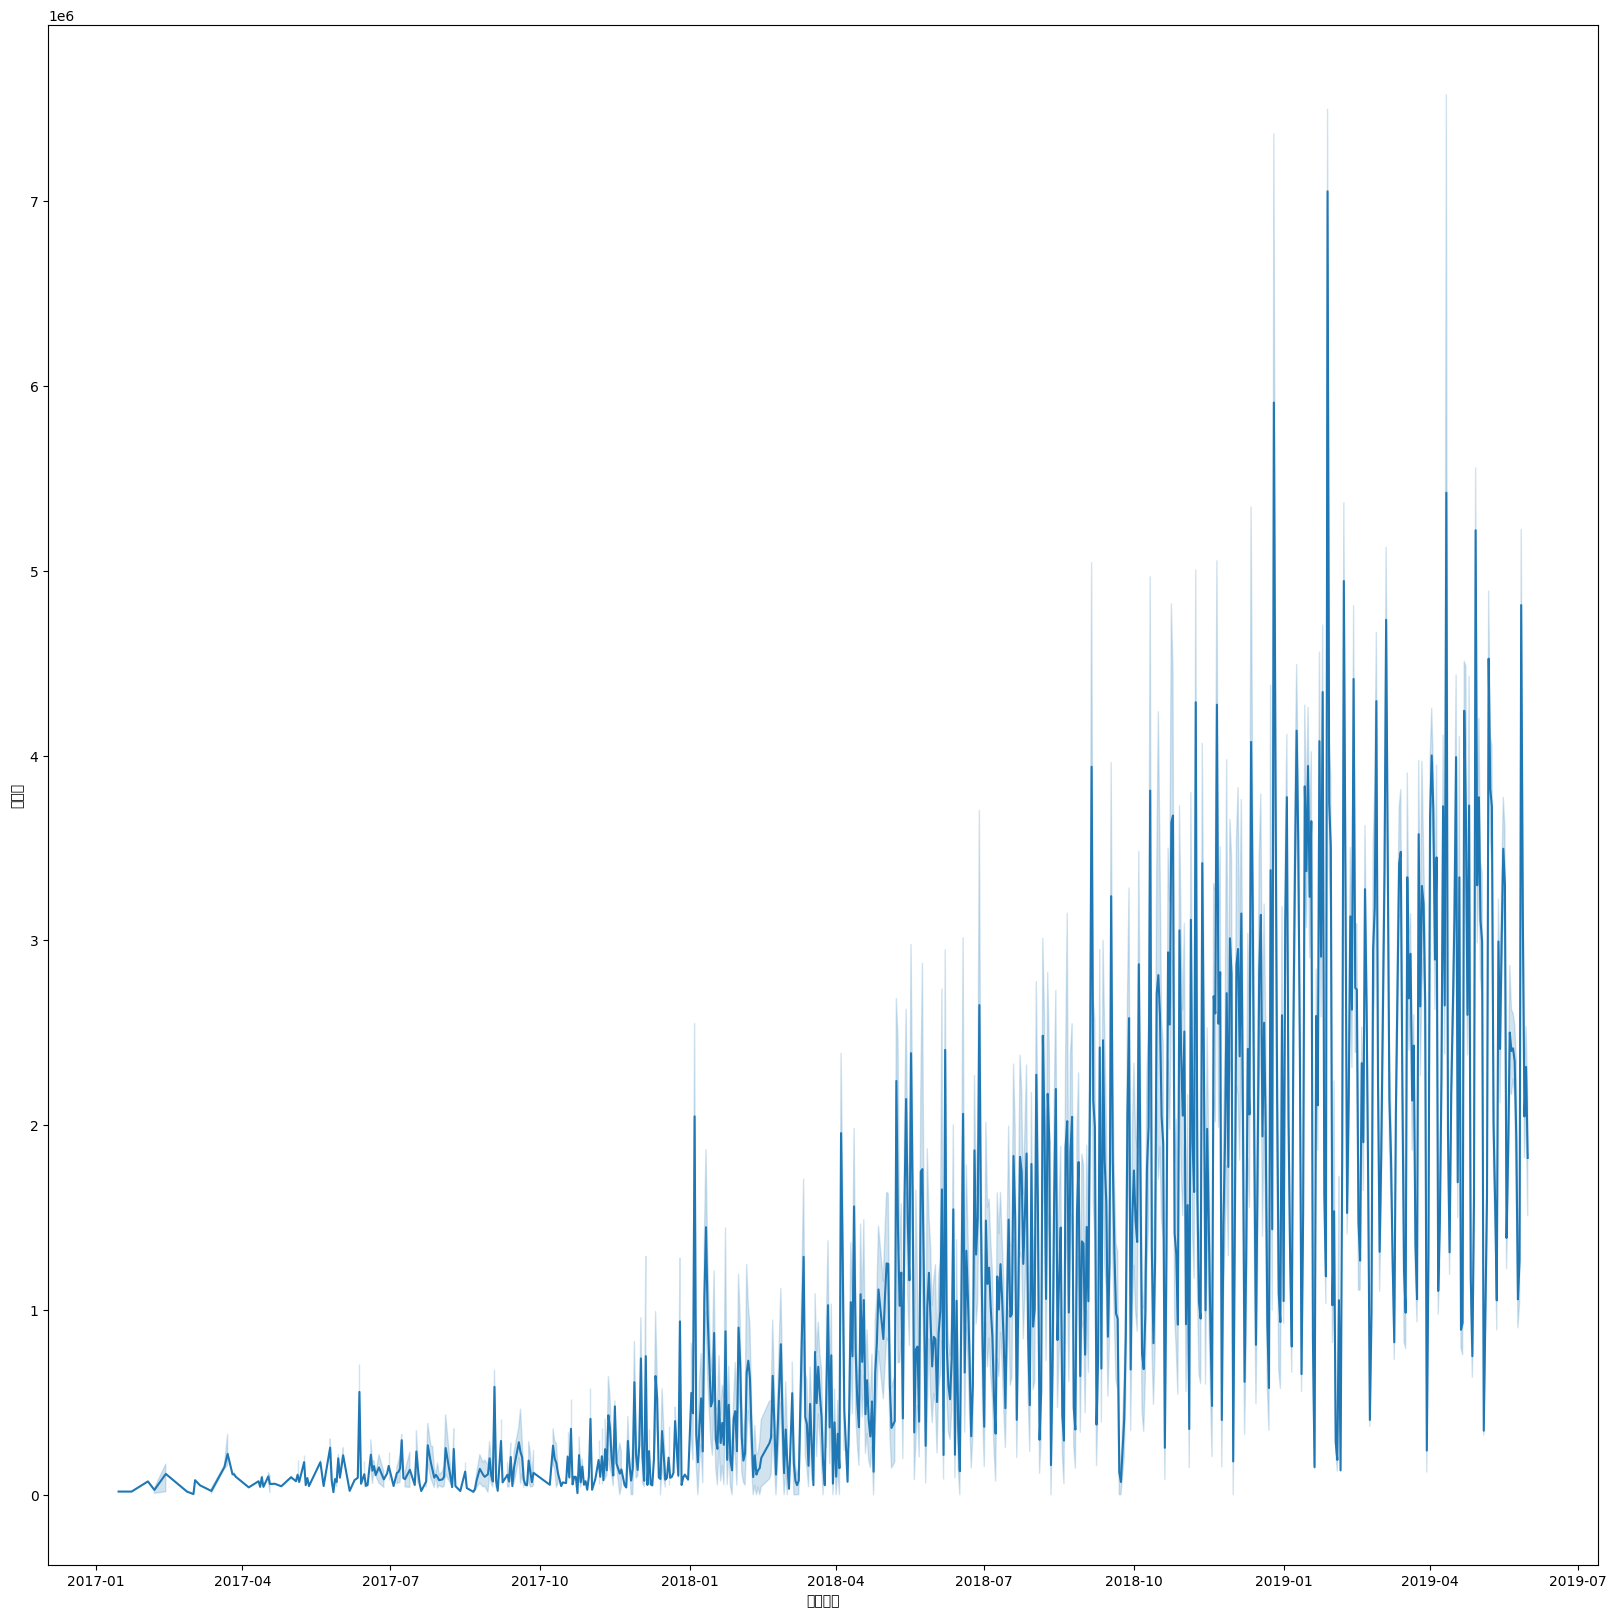

In [ ]:
plt.figure(figsize=(20, 20))
sns.lineplot(data=df_col, x="주문일시", y="판매가", estimator=sum)

In [ ]:
p1 = df_col.pivot_table(index='주문일시', values='판매가', aggfunc='sum').reset_index()
# sns.lineplot(data=p1, x="주문일시", y="판매가")

In [ ]:
df_col

,ID,나이,성별,주소,최종주문일,유입경로,유입기기,회원 가입일,최종주문일_,결제수단,배송시작일,배송완료일,수량,주문 시 회원등급,주문경로,주문일시,판매가,공급원가,마진,배송시간,시주소,년,월,일,week,day_of_week
0,pjkl77,28,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,2017-02-26 오후 10:55,"쿠폰,카드",2017-01-19,2017-01-19,1,일반,PC쇼핑몰,2017-01-15,17000,6200.0,10800.0,0 days,전라북도 전주시,2017,1,15,2,Sunday
1,pjkl77,28,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,2017-02-26 오후 10:55,"쿠폰,카드",2017-01-23,2017-01-24,1,사업자,PC쇼핑몰,2017-01-23,17000,6200.0,10800.0,1 days,전라북도 전주시,2017,1,23,4,Monday
2,pjkl77,28,남자,전라북도 전주시 완산구 효자동3가 1676-13,2017-02-26 오후 10:55,이메일광고,PC,2017-01-14,2017-02-26 오후 10:55,페이나우(카드),2017-02-27,2017-03-01,1,사업자,PC쇼핑몰,2017-02-26,17000,6200.0,10800.0,2 days,전라북도 전주시,2017,2,26,8,Sunday
3,91559380@n,47,남자,광주광역시 서구 화운로 152 (화정동),2018-05-09 오후 2:32,블로그광고,PC,2017-02-02,2018-05-09 오후 2:32,카드,2018-04-17,2018-04-21,1,일반,PC쇼핑몰,2018-04-16,77000,55000.0,22000.0,4 days,광주광역시 서구,2018,4,16,16,Monday
4,91559380@n,47,남자,광주광역시 서구 화운로 152 (화정동),2018-05-09 오후 2:32,블로그광고,PC,2017-02-02,2018-05-09 오후 2:32,카드,2018-04-17,2018-04-21,1,일반,PC쇼핑몰,2018-04-16,0,19030.0,0.0,4 days,광주광역시 서구,2018,4,16,16,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14442,vince0913,47,남자,서울특별시 용산구 후암동,2019-05-29 오전 11:50,인터넷검색,모바일,2019-05-29,2019-05-29 오전 11:50,"적립금,카드",2019-05-30,2019-06-03,1,일반,모바일웹,2019-05-29,55000,45000.0,10000.0,4 days,서울특별시 용산구,2019,5,29,22,Wednesday
14443,1094652352@k,47,남자,전라북도 전주시 덕진구 출판로 43 (장동),2019-05-31 오전 10:07,블로그광고,PC,2019-05-31,2019-05-31 오전 10:07,"적립금,카드",2019-05-31,2019-06-04,1,일반,PC쇼핑몰,2019-05-31,77000,60500.0,16500.0,4 days,전라북도 전주시,2019,5,31,22,Friday
14444,1094746791@k,47,남자,충청남도 공주시 한적2길 64-13 (금흥동),2019-05-31 오후 4:58,SNS광고,모바일,2019-05-31,2019-05-31 오후 4:58,카드,2019-06-03,2019-06-07,1,일반,모바일웹,2019-05-31,167640,118800.0,48840.0,4 days,충청남도 공주시,2019,5,31,22,Friday
14445,1094746791@k,47,남자,충청남도 공주시 한적2길 64-13 (금흥동),2019-05-31 오후 4:58,SNS광고,모바일,2019-05-31,2019-05-31 오후 4:58,카드,2019-06-03,2019-06-07,1,일반,모바일웹,2019-05-31,132360,92400.0,39960.0,4 days,충청남도 공주시,2019,5,31,22,Friday


In [ ]:
p2 = df_col.pivot_table(index=['주문일시', '유입기기'], values='판매가', aggfunc='sum').reset_index()
p2

,주문일시,유입기기,판매가
0,2017-01-15,PC,17000
1,2017-01-23,PC,17000
2,2017-02-02,PC,72000
3,2017-02-06,PC,11700
4,2017-02-06,모바일,14230
...,...,...,...
1194,2019-05-29,모바일,935770
1195,2019-05-30,PC,659960
1196,2019-05-30,모바일,1655480
1197,2019-05-31,PC,685100


<AxesSubplot:xlabel='주문일시', ylabel='판매가'>

c:\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Python39\lib\site-package

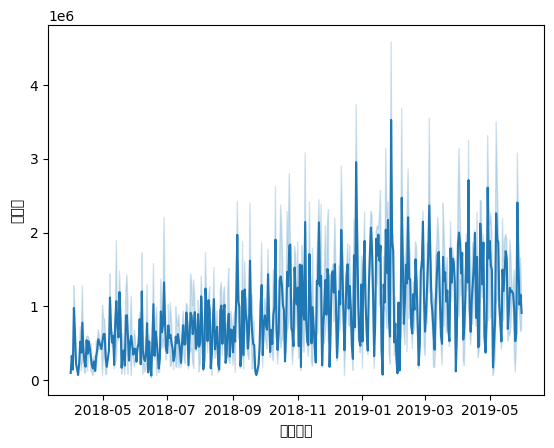

In [ ]:
sns.lineplot(data=p2[380:], x='주문일시', y='판매가')
# sns.lineplot(data=p2, x='주문일시', y='판매가', hue='유입기기')

In [ ]:
p2.iloc[380]

주문일시    2018-04-01 00:00:00
유입기기                     PC
판매가                   97500
Name: 380, dtype: object

In [ ]:
# target 값도 380번째부터 조지면 조져진다.

In [ ]:
p2.isnull().sum()

주문일시    0
유입기기    0
판매가     0
dtype: int64

In [ ]:
from pylab import rcParams

rcParams["figure.figsize"]= 13,10 #그래프의 SIZE를 조정해주는 함수

# #차트 기본 크기 설정
# mpl.rcParams['axes.labelsize'] = 14
# mpl.rcParams['xtick.labelsize'] = 12
# mpl.rcParams['ytick.labelsize'] = 12
# mpl.rcParams['text.color'] = 'k'

In [ ]:
p2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   주문일시    1199 non-null   datetime64[ns]
 1   유입기기    1199 non-null   object        
 2   판매가     1199 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 28.2+ KB


In [ ]:
p3 = p2.set_index("주문일시")

In [ ]:
p2.set_index("주문일시")

,유입기기,판매가
주문일시,,
2017-01-15,PC,17000
2017-01-23,PC,17000
2017-02-02,PC,72000
2017-02-06,PC,11700
2017-02-06,모바일,14230
...,...,...
2019-05-29,모바일,935770
2019-05-30,PC,659960
2019-05-30,모바일,1655480


In [ ]:
p2.columns

Index(['주문일시', '유입기기', '판매가'], dtype='object')

In [ ]:
p2['주문일시'].describe()

C:\Users\gpffh\AppData\Local\Temp\ipykernel_5960\1177225928.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  p2['주문일시'].describe()


count                    1199
unique                    695
top       2018-06-17 00:00:00
freq                        2
first     2017-01-15 00:00:00
last      2019-05-31 00:00:00
Name: 주문일시, dtype: object

In [ ]:
a= pd.to_datetime('2019-05-31')
b= pd.to_datetime('2017-01-15')

a - b

Timedelta('866 days 00:00:00')

In [ ]:
target = p3["판매가"].resample("1D").mean()
target = target.fillna( method="ffill")
target.isnull().sum()

0

In [ ]:
target = p3["판매가"].resample("1D").mean()
target = target.fillna( method="ffill")
target.isnull().sum()

0

In [ ]:
target = target

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.tsa.api as tsa
mpl.rc("font", family = "Malgun Gothic")

In [ ]:
model_series = tsa.seasonal_decompose(target, model="additive")
model_series

c:\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


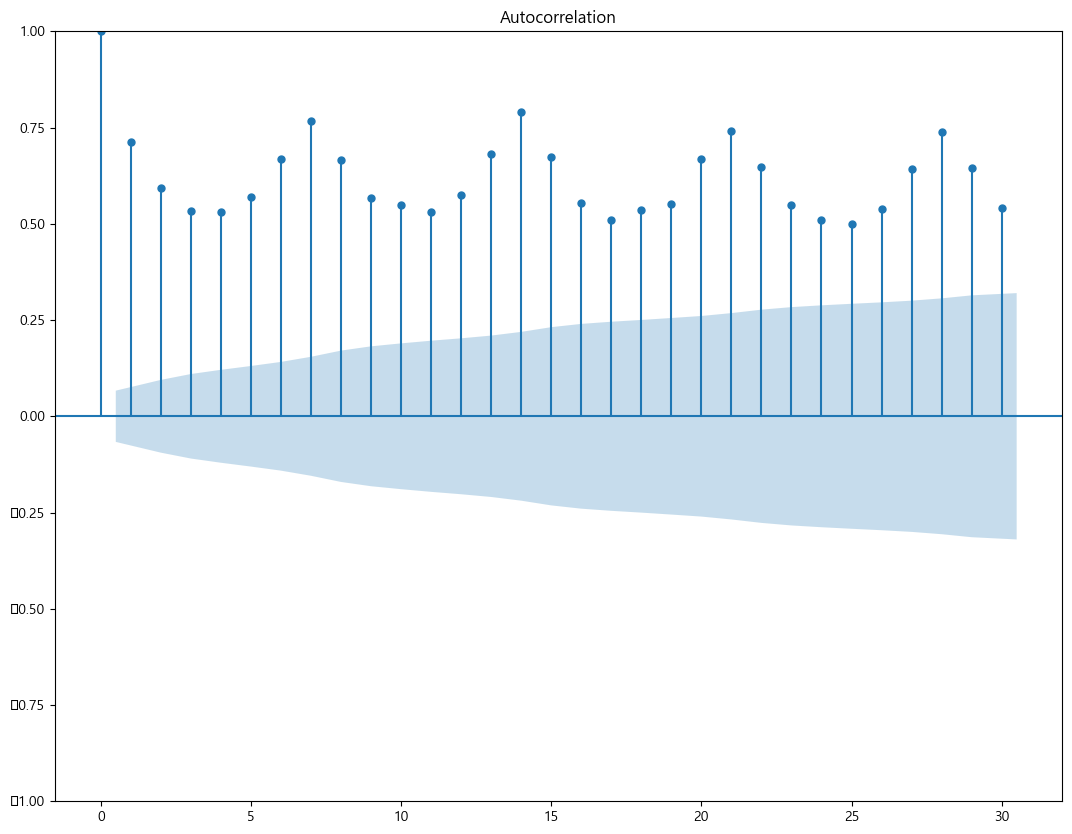

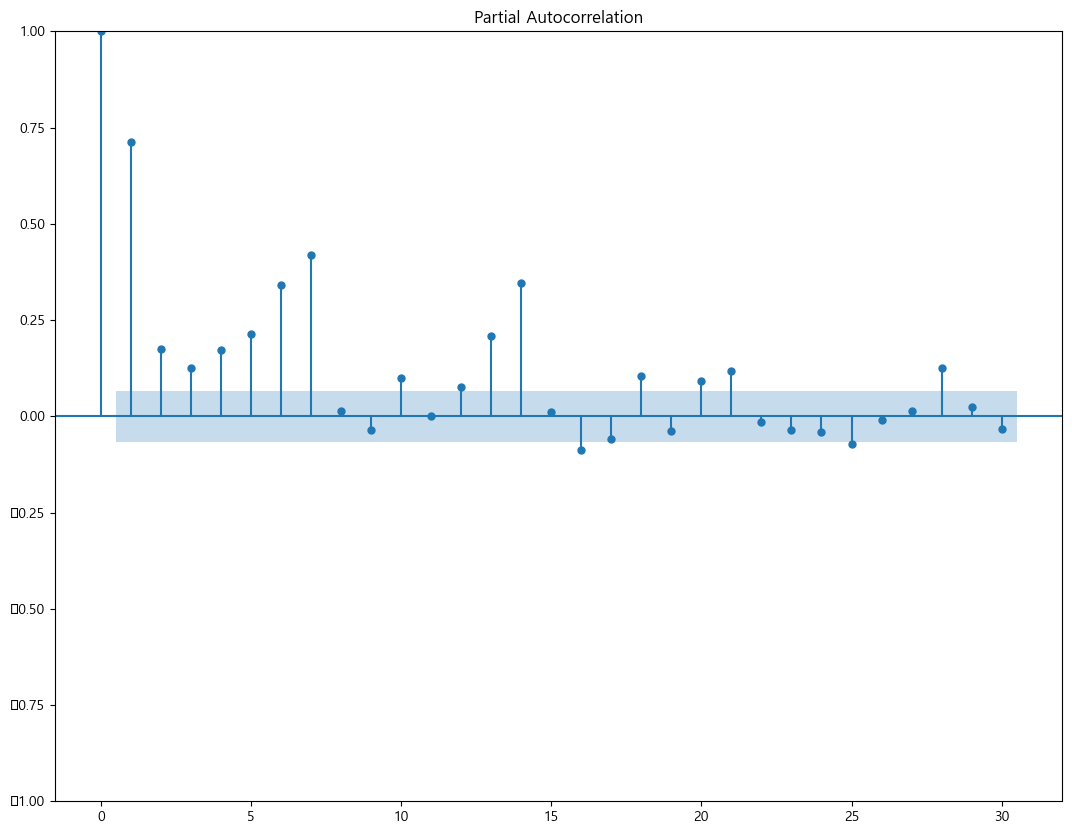

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(target)
plot_pacf(target)
plt.show()

참조 : https://byeongkijeong.github.io/ARIMA-with-Python/

c:\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
c:\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


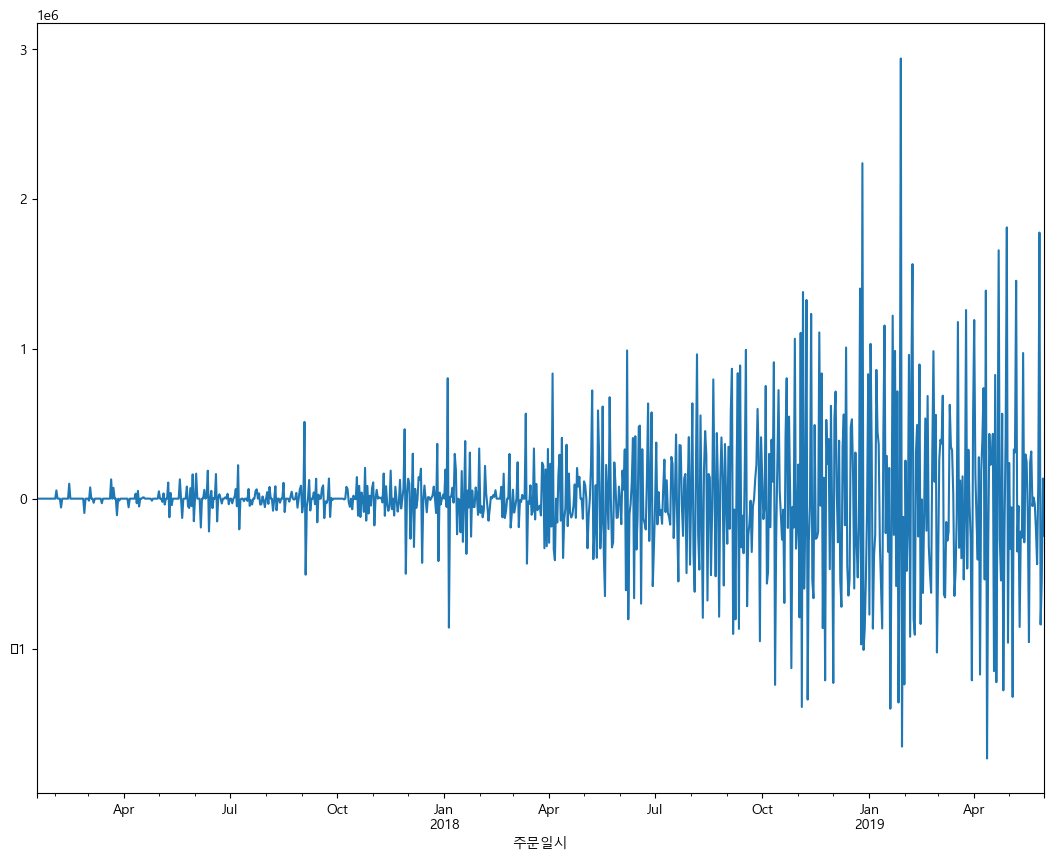

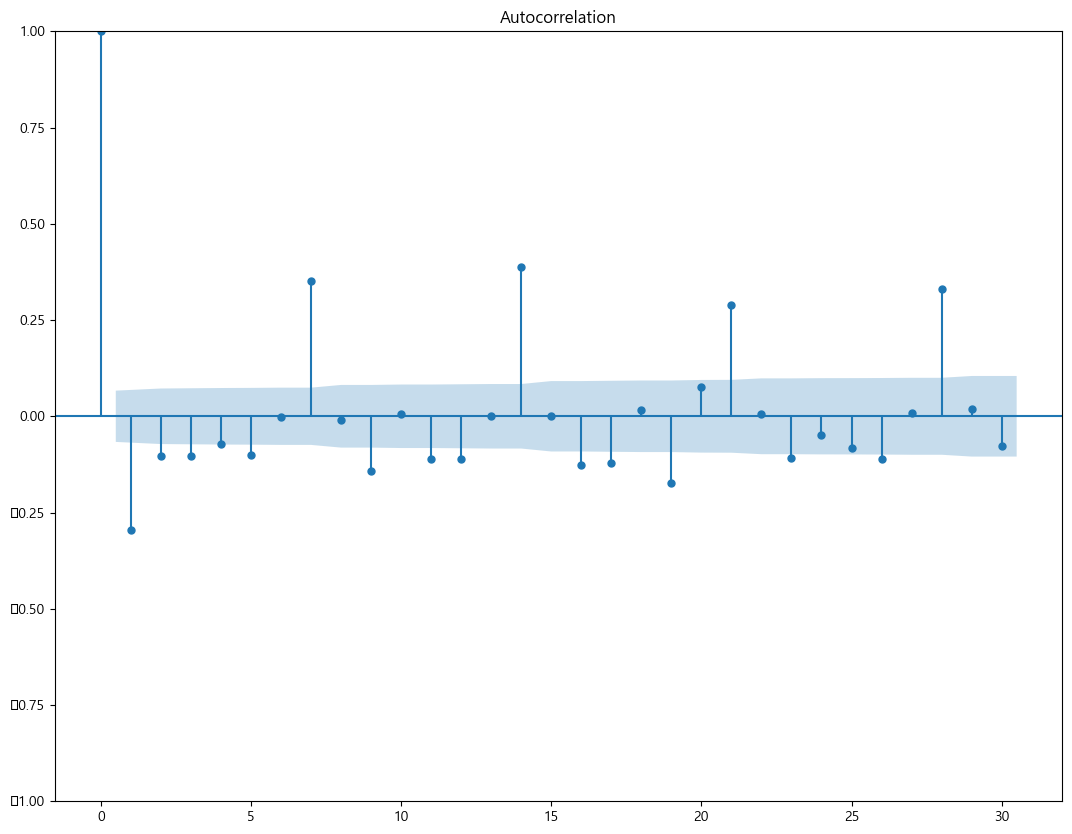

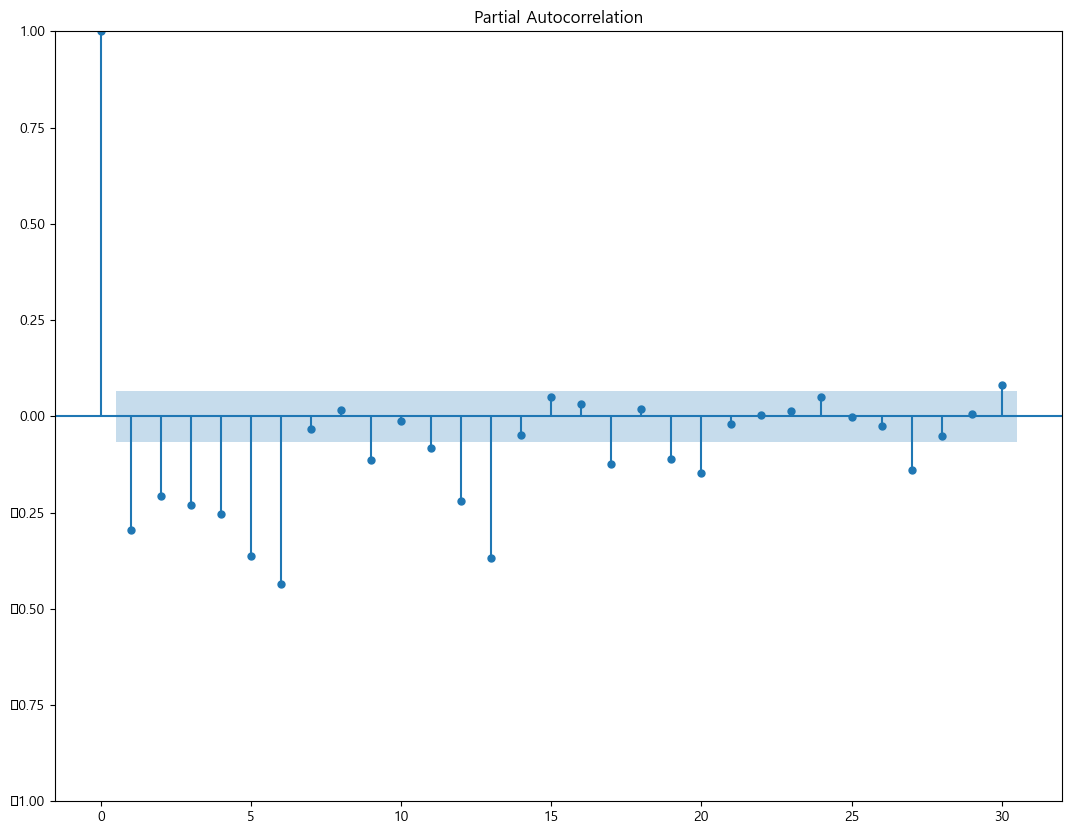

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_1=target.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(target, order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# ‘P > z’ 값이 일반적으로 학습의 적정성을 위해 확인되는 t-test값이다.
# (‘P > z’) < 0.05. 정규성을 띄지 않는다.

model_fit.plot_predict()

NameError: name 'model_fit' is not defined

In [ ]:
target

주문일시
2017-01-15      17000.0
2017-01-16      17000.0
2017-01-17      17000.0
2017-01-18      17000.0
2017-01-19      17000.0
                ...    
2019-05-27    2407430.0
2019-05-28    1567800.0
2019-05-29    1023565.0
2019-05-30    1157720.0
2019-05-31     911460.0
Freq: D, Name: 판매가, Length: 867, dtype: float64

In [ ]:
fore = model_fit.forecast(steps=1)
print(fore)

NameError: name 'model_fit' is not defined

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
c:\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44032 missing from 

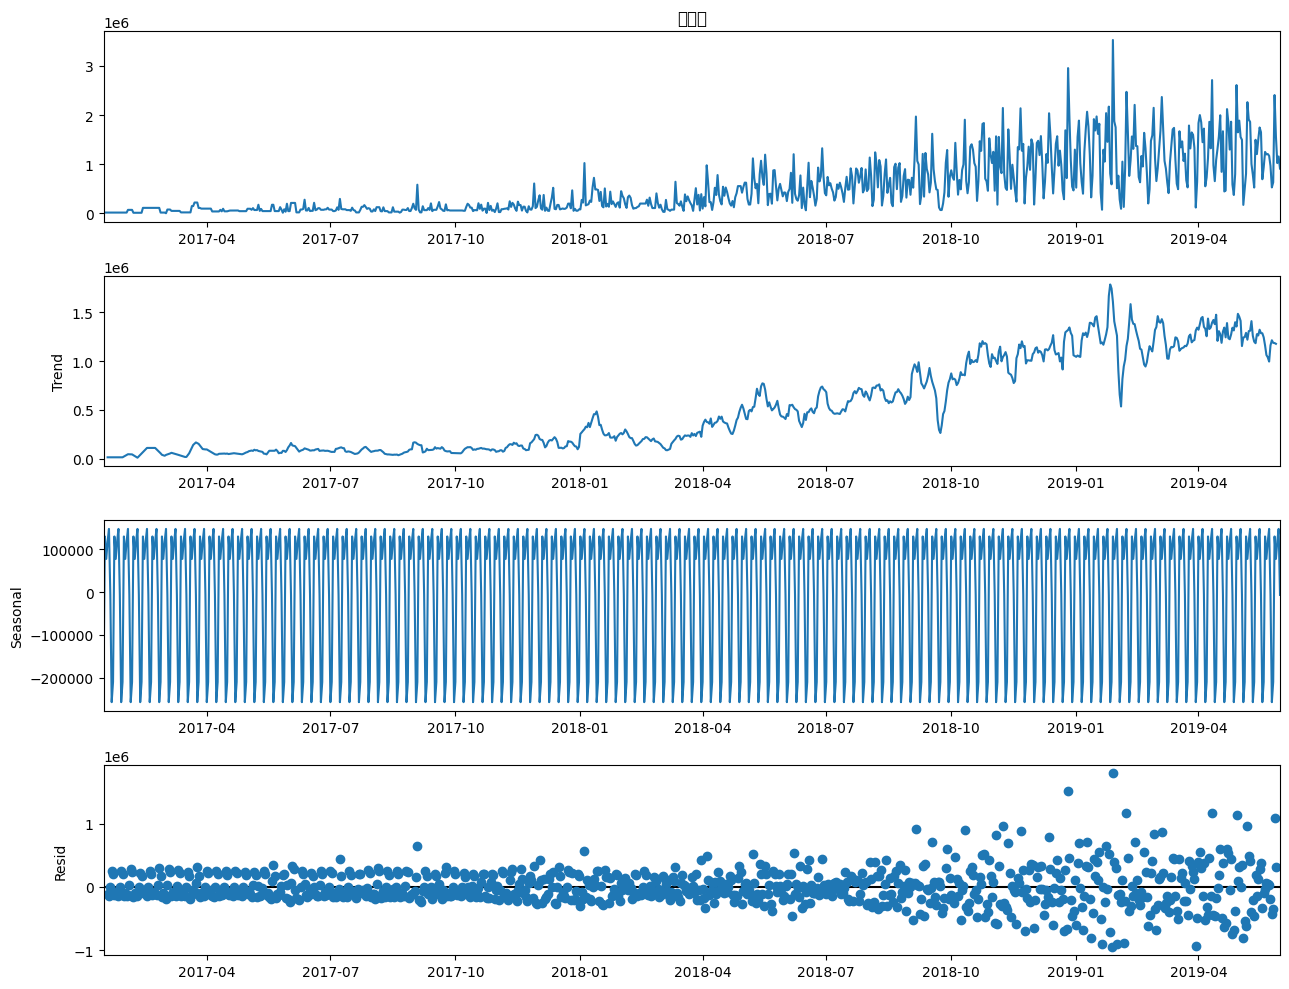

In [ ]:
fig = model_series.plot()
plt.show()

In [ ]:
import itertools # 반복수를 만드는 라이브러리 
p = d  = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2] , 12) for x in list(itertools.product(p, d, q))]

In [ ]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [ ]:


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(target, order=param,
                                        seasonal_order= param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
            continue

c:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.sort_values(by='AIC')
# ARIMA_list.to_excel('arima_model_list.xlsx')

,Parameter,Seasonal,AIC
47,"(1, 0, 1)","(1, 1, 1, 12)",24101.366515
15,"(0, 0, 1)","(1, 1, 1, 12)",24102.629941
11,"(0, 0, 1)","(0, 1, 1, 12)",24105.024256
43,"(1, 0, 1)","(0, 1, 1, 12)",24105.358959
7,"(0, 0, 0)","(1, 1, 1, 12)",24121.418328
39,"(1, 0, 0)","(1, 1, 1, 12)",24129.002393
35,"(1, 0, 0)","(0, 1, 1, 12)",24134.403106
3,"(0, 0, 0)","(0, 1, 1, 12)",24143.707776
63,"(1, 1, 1)","(1, 1, 1, 12)",24180.330456
59,"(1, 1, 1)","(0, 1, 1, 12)",24198.526140


In [ ]:
mod = tsa.statespace.SARIMAX(target,order=(0, 0, 1),seasonal_order=(0, 1, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                판매가   No. Observations:                  867
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood              -12049.512
Date:                            Wed, 19 Oct 2022   AIC                          24105.024
Time:                                    22:05:31   BIC                          24119.228
Sample:                                01-15-2017   HQIC                         24110.468
                                     - 05-31-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3116      0.046      6.786      0.000       0.222       0.402
ma.S.L12      -0.8239      0.024   

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_

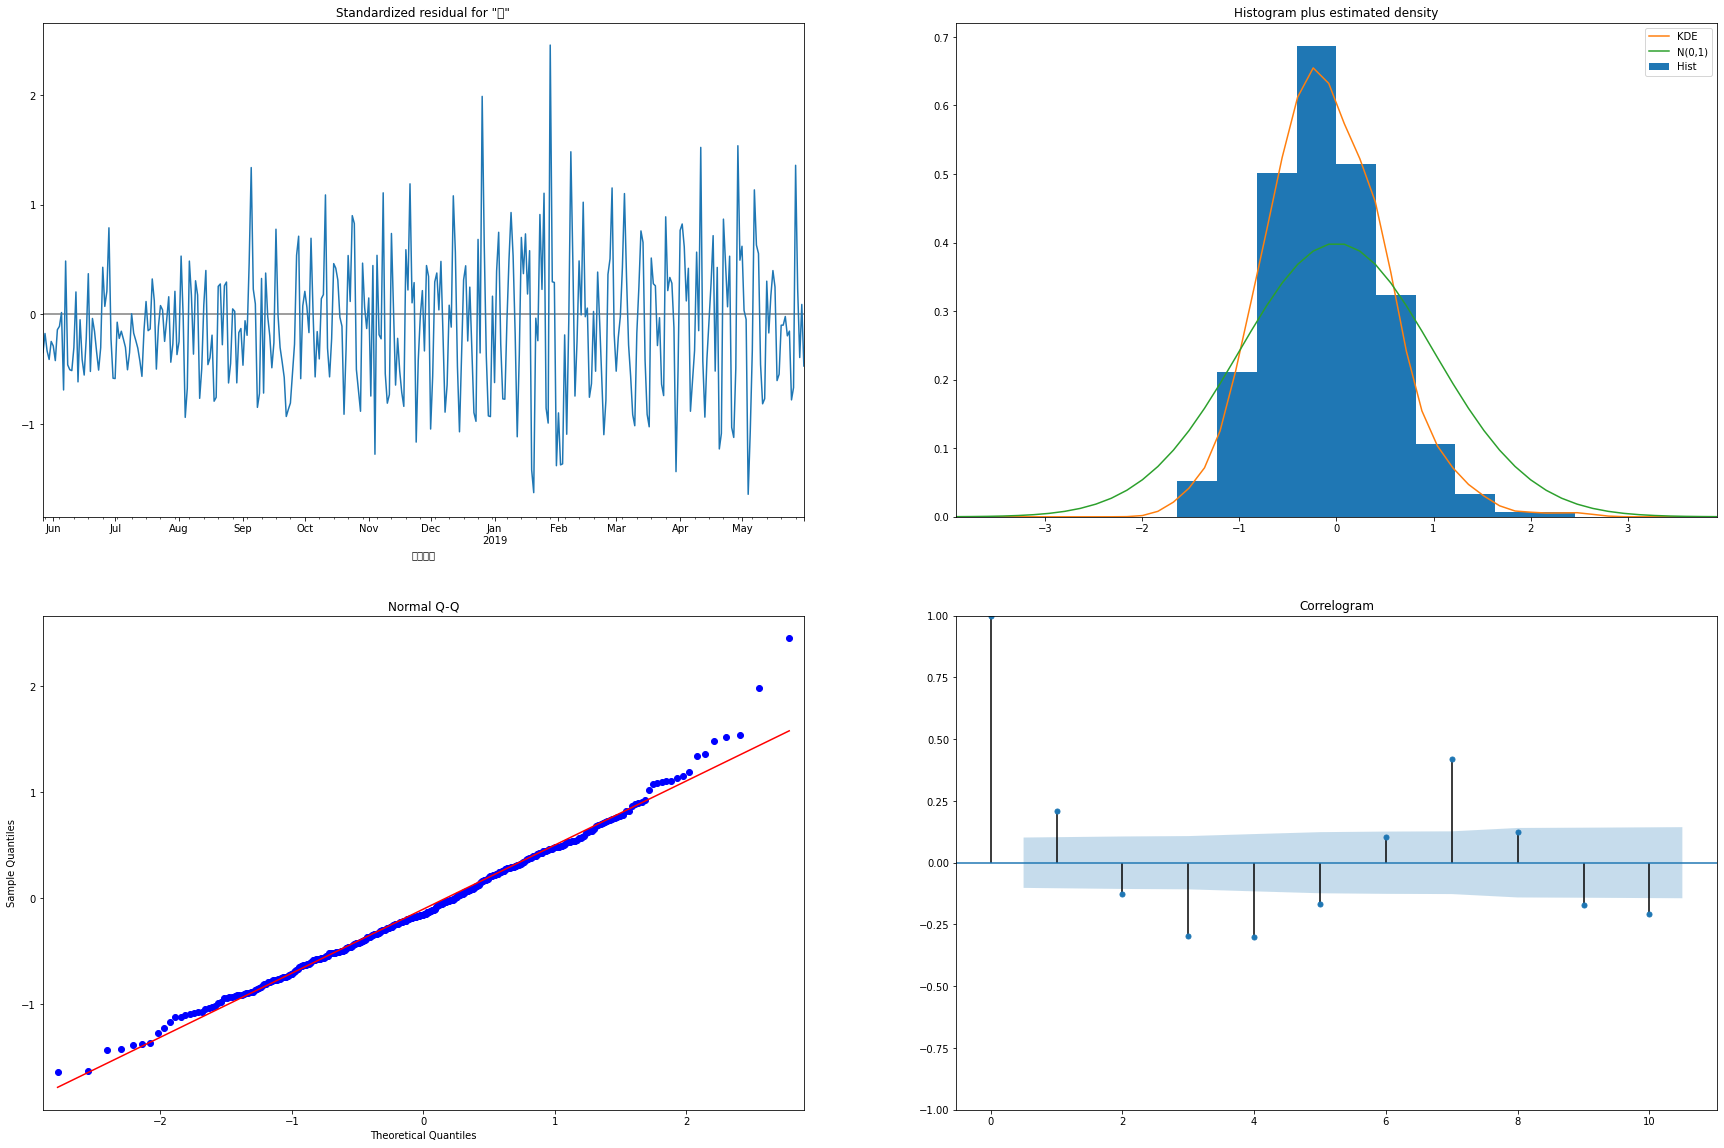

In [ ]:
results.plot_diagnostics(figsize=(30, 20))
plt.show()

In [ ]:
results.get_prediction()

In [ ]:
import statsmodels.api as sm

In [ ]:
mod = sm.tsa.statespace.SARIMAX(target,
                                 order=(0, 1, 1),
                                 seasonal_order=(0, 1, 1, 12),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)

results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                판매가   No. Observations:                  397
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -5480.635
Date:                            Wed, 19 Oct 2022   AIC                          10967.271
Time:                                    08:18:42   BIC                          10979.011
Sample:                                04-30-2018   HQIC                         10971.934
                                     - 05-31-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8912      0.071    -12.504      0.000      -1.031      -0.752
ma.S.L12      -0.9401      0.060   